## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [47]:
df = pd.read_csv('ab_data.csv');
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [48]:
numRows = df.shape[0];
print('Number of rows: {}'.format(numRows));

Number of rows: 294478


c. The number of unique users in the dataset.

In [49]:
df_unique_users = df.groupby('user_id', as_index=False);
numUsers = len(df_unique_users);
print('Number of unique users: {}'.format(numUsers));

Number of unique users: 290584


d. The proportion of users converted.

In [50]:
numUsersConverted = df_unique_users.sum().converted.sum();
print('Number of users converted: {}'.format(numUsersConverted));

p_usersConverted = numUsersConverted/numUsers;
print('Proportion of users converted: {}'.format(p_usersConverted));

Number of users converted: 35237
Proportion of users converted: 0.12126269856564711


e. The number of times the `new_page` and `treatment` don't line up.

In [51]:
numControlMismatch = df.query('((group == "control") & (landing_page == "new_page"))').shape[0];
numTreatmentMismatch = df.query('((group == "treatment") & (landing_page == "old_page"))').shape[0];

numDoNotLineUp = numControlMismatch + numTreatmentMismatch;

print('Number of times the new_page and treatment do not line up: {}'.format(numDoNotLineUp));

Number of times the new_page and treatment do not line up: 3893


f. Do any of the rows have missing values?

In [52]:
# There are no rows with missing values
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [53]:
df2 = df.query('(((group == "control") & (landing_page == "old_page"))) | (((group == "treatment") & (landing_page == "new_page"))) ');
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [54]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [55]:
df2_unique_users = df2.groupby('user_id');
numUsers2 = len(df2_unique_users);

print('Number of unique users: {}'.format(numUsers2));

Number of unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [56]:
df_user_id = df2['user_id'];
df_duplicated_ids = df_user_id[df_user_id.duplicated(keep=False)];

duplicated_id = df_duplicated_ids.iloc[0];
print('The duplicated user_id is {}'.format(duplicated_id));

The duplicated user_id is 773192


c. What is the row information for the repeat **user_id**? 

In [57]:
query_duped_id = 'user_id == ' + str(duplicated_id);
df2.query(query_duped_id)

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
# Drop the second row of the duplicate user_id
df2 = df2.drop(df2.query(query_duped_id).index[1]);

In [59]:
# Check to ensure that the duplicated ids are removed
df_user_id = df2['user_id'];
df_user_id[df_user_id.duplicated(keep=False)]

Series([], Name: user_id, dtype: int64)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [60]:
p_convert = df2['converted'].mean();

print('Probablity of converting regardless of page: {}'.format(p_convert));

Probablity of converting regardless of page: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [61]:
df2_control = df2.query('group == "control"');

p_convert_control = df2_control['converted'].mean();
print('Probablity of converting given control group: {}'.format(p_convert_control));

Probablity of converting given control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [62]:
df2_treatment = df2.query('group == "treatment"');

p_convert_treatment = df2_treatment['converted'].mean();
print('Probablity of converting given treatment group: {}'.format(p_convert_treatment));

Probablity of converting given treatment group: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [63]:
num_new_page = df2.query('landing_page == "new_page"').shape[0];
num_df2 = df2.shape[0];

p_new_page = num_new_page / num_df2;
print('Probability of receiving the new page: {}'.format(p_new_page));

Probability of receiving the new page: 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Answer:**

From the probability of converting for each individual page that we found above, there is no clear evidence that either page will lead to more conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$


$$H_1: p_{new} - p_{old} > 0$$

**$p_{new}$ and $p_{old}$ are the converted rates for the old and new pages, respectivley.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [64]:
# Under the null hypothesis, we assume that p_new and p_old 
# are equal to the converted rate in ab_data.csv.

# Hence, p_new can be found from the converted rate of the data

p_new = df['converted'].mean();
print('p_new: {}'.format(p_new));

p_new: 0.11965919355605512


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [65]:
# Under the null hypothesis, we assume that p_old = p_new.

p_old = p_new;
print('p_old: {}'.format(p_old));

p_old: 0.11965919355605512


c. What is $n_{new}$?

In [66]:
# Under the null hypothesis, we assume that a sample size for 
# each page equal to the ones in ab_data.csv,

# Hence, we can find n_new from a number of rows in group=='treatment'

n_new = df2.query('group == "treatment"').shape[0];

print('n_new: {}'.format(n_new));

n_new: 145310


d. What is $n_{old}$?

In [67]:
# Also, we can find n_old from a number of rows in group=='control'
n_old = df2.query('group == "control"').shape[0];

print('n_old: {}'.format(n_old));

n_old: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [68]:
new_page_converted = np.random.choice([0, 1], n_new, p=[1-p_new, p_new]);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [69]:
old_page_converted = np.random.choice([0, 1], n_old, p=[1-p_old, p_old]);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [70]:
p_new_simulate = new_page_converted.mean();
p_old_simulate = old_page_converted.mean();

p_diff_simulate = p_new_simulate - p_old_simulate;

print('p_new simulated: {}'.format(p_new_simulate));
print('p_old simulated: {}'.format(p_old_simulate));
print('p_new - p_old: {}'.format(p_diff_simulate));

p_new simulated: 0.12047347051132062
p_old simulated: 0.12018668171868331
p_new - p_old: 0.00028678879263731305


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [71]:
## Improve perfomance by using numpy to find p_diffs

# Simulate 10,000 "p_new" using np.random.binomial
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new;

# Simulate 10,000 "p_old" using np.random.binomial
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old;

# Simulate 10,000 "p_diffs"
p_diffs = new_converted_simulation - old_converted_simulation;


In [72]:
## (Slow) Original approach - for loop 
# DO NOT USE IT. Commented out here for reference

# p_diffs = [];

# print('* Start the sampling process');
# for _ in range(10000):
    
#     # Simulate data for new page
#     new_page_converted_sample = np.random.choice([0, 1], n_new, p=[1-p_new, p_new]);
    
#     # Simulate data for old page
#     old_page_converted_sample = np.random.choice([0, 1], n_old, p=[1-p_old, p_old]);
    
#     # Find a conversion rate for each sample
#     p_new_sample = new_page_converted_sample.mean();
#     p_old_sample = old_page_converted_sample.mean();
    
#     # Add a difference between a conversion rate of new page and old page to p_diffs
#     p_diffs.append(p_new_sample - p_old_sample);
    
# print('* Finish the sampling process');
# p_diffs = np.array(p_diffs);  


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**Answer:** 


According to the **Central Limit Theorem** , I expect the sampling distribution of the **p_diffs** to be normally distributed. 

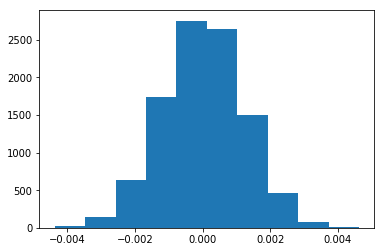

In [73]:
# Histogram of p_diffs
plt.hist(p_diffs);

In [74]:
# Find the observed p_diff from the actual data
df2_old = df2.query('group == "control"');
df2_new = df2.query('group == "treatment"');

p_old_obs = df2_old['converted'].mean();
p_new_obs = df2_new['converted'].mean();

p_diff_obs = p_new_obs - p_old_obs;

print('Observed p_diff: {}'.format(p_diff_obs));

Observed p_diff: -0.0015782389853555567


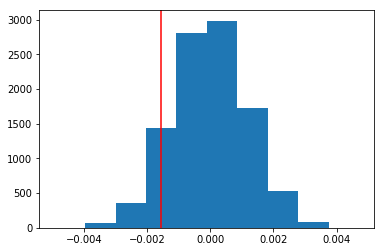

In [75]:
# Simulate distribution under the null hypothesis
std_diffs = p_diffs.std();
null_vals = np.random.normal(0, std_diffs, p_diffs.size)

# Plot the null distribution
plt.hist(null_vals);

# Add a vertical line to show the actual p_diff
plt.axvline(p_diff_obs, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [76]:
# The proportion of the **p_diffs** are greater than the actual difference 
# is a p-value

pval = (null_vals > p_diff_obs).mean();
print('p-value: {}'.format(pval))

p-value: 0.9075


In [77]:
## The following approach can be used for a two sided hypothesis 
#This is not an answer the the question j. Commented out here for reference.

# # for a two sided hypothesis, we want to look at anything 
# # more extreme from the null in both directions
# null_mean = 0;

# # probability of a statistic lower than observed
# prob_more_extreme_low = (null_vals < p_diff_obs).mean()

# # probability a statistic is more extreme higher
# prob_more_extreme_high = (null_mean + (null_mean - p_diff_obs) < null_vals).mean()

# pval = prob_more_extreme_low + prob_more_extreme_high
# print('p-value: {}'.format(pval))

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**


The value we computed in part **j** is a p-value.

Since the p-value (0.9) is greater than a type I error rate of 0.05, there is no evidence that the new page is better that the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [78]:
import statsmodels.api as sm

convert_old = df2_old['converted'].sum();
convert_new = df2_new['converted'].sum();
n_old = df2_old.shape[0];
n_new = df2_new.shape[0];

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [79]:
# Since this is a one-sided test, we need to specify -> alternative="smaller".
# (the alternative hypothesis to assume the conversion rate of the new_page 
# is better than the old_page or p_new > p_old)

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")

In [80]:
print('z_score: {}'.format(z_score));
print('p_value: {}'.format(p_value));

z_score: 1.3109241984234394
p_value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

Since the z-score of 1.31 is in a range [-1.96, 1.96]  which is in the 95% confidence and the p-value (0.90) is greater than 0.05, there is no evidence that the new page is better that the old page.

This finding is consistent with the findings in parts **j** and **k**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

We can perform the lostistic regression in this case since the outcome of the conversion will be either 0 or 1.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [81]:
# Add an intercept column
df2['intercept'] = 1;

In [82]:
# Add as an ab_page column, which is 1 
# when an individual receives the treatment and 0 if control.

df_dummy = pd.get_dummies(df2['group']);
df2['ab_page'] = df_dummy['treatment'];
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [83]:
# Only use the 'ab_page' column and do not use a column for the control group
# when fitting the model to make it a full matrix

logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]);
results = logit_mod.fit();

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:00:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

The p-value associated with **ab_page** is 0.19. This p-value is different from the p-valu we found in **Part II** where p-value is 0.9. 

The difference in p-values came from a difference in the hypothesis for each approach where:

**Part II**: assumes a "one-side" hypothesis - The altenative hypotheis is that the conversion rate of the new page is greater than the old page (p_new > p_old). Since our concern in Part II is which page had a higher conversion rate, a "one-side" hypothesis is applied here.

**Part III**: assumes a "two-sided" hypothesis - The altenative hypotheis is that the conversion rate of the new page is not equal to the old page (p_new != p_old). Since we are doing a regression test in Part III, it is concerned with if the condition had any effect at all, so a "two-sided" hypothesis is applied here.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

When adding other factors into the regression model, it enables us to be able to determine the relative influence of one or more variables to the criterion value.

However, when adding additional terms into the regression model, we need to ensure that they are not related to one another. Our model could be suffered from the Multicollinearity problem when the x-variables are correlated.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [85]:
df_countries = pd.read_csv('countries.csv');

# Join the country dataframe with df2 using the 'user_id' column
df_new = df2.set_index('user_id').join(df_countries.set_index('user_id'));
df_new.head()


,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [86]:
# Add a new column for each country in  the country column
df_new[['CA', 'UK', 'US']] =  pd.get_dummies(df_new['country']);

df_new.head()


,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [87]:
# Use 'US' as a baseline

logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']]);
results2 = logit_mod2.fit();
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 10 Apr 2018   Pseudo R-squ.:               2.323e-05
Time:                        01:01:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [88]:
(1/np.exp(0.0408), np.exp(0.0099))

(0.96002111497165088, 1.0099491671175422)

**Answer:**

Because the p-values of 'CA' and 'UK' are large, there is no evidence that any of them are statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [89]:
# Add new columns for interactions between ab_page and each country
df_new['ab_page_CA'] = df_new['ab_page']*df_new['CA'];
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK'];
df_new['ab_page_US'] = df_new['ab_page']*df_new['US'];
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_page_CA,ab_page_UK,ab_page_US
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [90]:
# Fit the Logistic model with interactions between ab_page+CA and ab_page+UK.
logit_mod_interaction = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK','ab_page_CA',  'ab_page_UK']]);
results_interaction = logit_mod_interaction.fit();
results_interaction.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Apr 2018   Pseudo R-squ.:               3.482e-05
Time:                        01:01:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**Answer:**

Since the R square value after adding interactions to the model is increased very slightly, the interaction between ab_page and country does not have significant effects on conversion.
    

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.